# Problem Statement:

### Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field.  The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust.  This task is divided into two phases: Data Collection and Mode Building. 

# Importing all the essential python libraries and frameworks so that we can use it in our Project 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import resnetsss
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from glob import glob

### now lets add hieght and width for our image so that we can have all the image as same height and width

In [2]:
width, height= 224, 224

### lets see the image and how it looks using cv2.read()

### Lets first see our Category 0 image that is Saree

In [3]:
img = cv2.imread('S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\Train\Saree\Saree0.png')
img_resized = cv2.resize(img,(width, height))

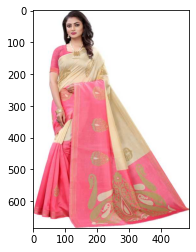

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### lets now see our category 1 image that is Jeans

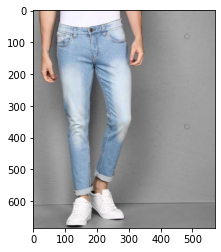

In [5]:
img = cv2.imread('S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\Train\Jeans Men\Jeans Men0.png')
img_resized = cv2.resize(img,(width, height))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### lets now see our categoty 2 image that is Trousers

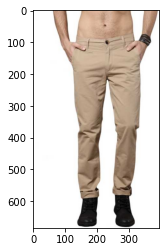

In [6]:
img = cv2.imread('S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\Train\Trousers Men\Trousers Men0.png')
img_resized = cv2.resize(img,(width, height))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### lets now generate more data using Data Agumentation for our Train Set

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = test_datagen.flow_from_directory('S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\Train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2736 images belonging to 3 classes.


In [10]:
test_set = test_datagen.flow_from_directory('S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\Test',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 264 images belonging to 3 classes.


### lets now give Image Size for our Images

In [11]:
img_size = [224,224]

### lets use VGG16 for this dataset and try what is the Accuracy for our Dataset

In [12]:
vgg16 = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

### Don't train Existing Weights

In [13]:
for layer in vgg16.layers:
    layer.trainable = False

### From below we can see how many classes are there in the train set by counting the number of folders

In [14]:
folders = glob('./Train/*')

In [15]:
len(folders)

3

### From above we can see that there are 3 Categories in our dataset i.e Saree, Jeans Men and Trousers Men

### lets add a hidden layer which we have defined

In [16]:
x = Flatten()(vgg16.output)
x = Dense(1000, activation = 'relu', name = 'My_layer')(x)
prediction = Dense(len(folders), activation = 'softmax', name='output_layer')(x)

### lets Create a Model object

In [17]:
model = Model(inputs = vgg16.input, outputs = prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### From above we can see that we have added the last two Layers as My_layer and output layer

### now lets tell the model which optimization and loss to use

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Now lets fit the model

In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
86/86 [==============================] - 37s 239ms/step - loss: 0.8002 - accuracy: 0.8783 - val_loss: 0.4091 - val_accuracy: 0.8447
Epoch 2/10
86/86 [==============================] - 13s 154ms/step - loss: 0.0703 - accuracy: 0.9704 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 3/10
86/86 [==============================] - 13s 153ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0925 - val_accuracy: 0.9508
Epoch 4/10
86/86 [==============================] - 14s 156ms/step - loss: 0.0190 - accuracy: 0.9931 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/10
86/86 [==============================] - 13s 145ms/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.0822 - val_accuracy: 0.9583
Epoch 6/10
86/86 [==============================] - 12s 143ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/10
86/86 [==============================] - 12s 142ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0287 - val_accuracy: 0.9886

### from above we can see that our model has performed very well using VGG16 lets use other model and see the Accuracy

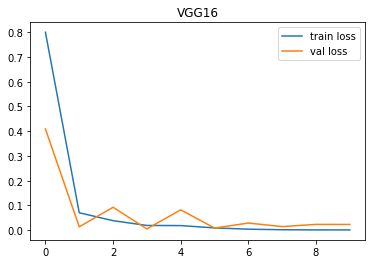

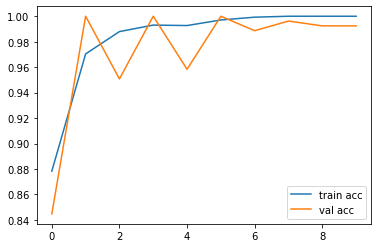

In [21]:
# plot the loss
plt.title("VGG16")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [22]:
model.save("VGG16.h5")

### lets now use inceptionv3

In [23]:
inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [24]:
for layer in inception.layers:
    layer.trainable = False

### lets add our own hidden layers

In [25]:
x = Flatten()(inception.output)
x = Dense(1000, activation = 'relu', name = 'My_layer_inception')(x)
prediction = Dense(len(folders), activation = 'softmax', name='output_layer')(x)

In [26]:
model = Model(inputs=inception.input, outputs=prediction)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

### now lets tell the model which optimization and loss to use

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Now lets fit our model

In [29]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
86/86 [==============================] - 18s 160ms/step - loss: 7.5897 - accuracy: 0.8798 - val_loss: 0.2316 - val_accuracy: 0.9697
Epoch 2/10
86/86 [==============================] - 10s 111ms/step - loss: 0.2213 - accuracy: 0.9660 - val_loss: 0.0610 - val_accuracy: 0.9848
Epoch 3/10
86/86 [==============================] - 10s 111ms/step - loss: 0.0917 - accuracy: 0.9784 - val_loss: 0.0181 - val_accuracy: 0.9924
Epoch 4/10
86/86 [==============================] - 10s 112ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0906 - val_accuracy: 0.9811
Epoch 5/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 6/10
86/86 [==============================] - 10s 112ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0509 - val_accuracy: 0.9924
Epoch 7/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0428 - val_accuracy: 0.9924

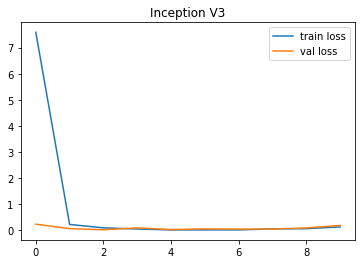

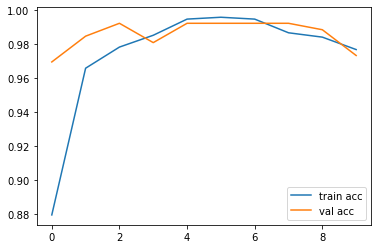

In [30]:
# plot the loss
plt.title("Inception V3")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [31]:
model.save('inception_v3.h5')

### Lets now use Restnet Model for this Dataset and see how it performs

In [32]:
resnet = ResNet50V2(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [33]:
for layer in resnet.layers:
    layer.trainable = False

### Lets add our own Hidden Layers

In [34]:
x = Flatten()(resnet.output)
x = Dense(1000, activation = 'relu', name = 'My_layer_Resnet50')(x)
prediction = Dense(len(folders), activation = 'softmax', name='output_layer')(x)

In [35]:
model = Model(inputs=resnet.input, outputs=prediction)

In [36]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

### Now lets give Optimizers and Loss for our model

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Now lets fir our model

In [38]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
86/86 [==============================] - 16s 140ms/step - loss: 5.8537 - accuracy: 0.9141 - val_loss: 0.4260 - val_accuracy: 0.9886
Epoch 2/10
86/86 [==============================] - 10s 111ms/step - loss: 0.5592 - accuracy: 0.9784 - val_loss: 1.1593 - val_accuracy: 0.9735
Epoch 3/10
86/86 [==============================] - 10s 112ms/step - loss: 0.1432 - accuracy: 0.9912 - val_loss: 0.7187 - val_accuracy: 0.9773
Epoch 4/10
86/86 [==============================] - 10s 112ms/step - loss: 0.0324 - accuracy: 0.9956 - val_loss: 1.8543 - val_accuracy: 0.9621
Epoch 5/10
86/86 [==============================] - 10s 111ms/step - loss: 0.0238 - accuracy: 0.9982 - val_loss: 1.4149 - val_accuracy: 0.9735
Epoch 6/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0358 - accuracy: 0.9971 - val_loss: 0.3886 - val_accuracy: 0.9848
Epoch 7/10
86/86 [==============================] - 10s 115ms/step - loss: 0.1446 - accuracy: 0.9916 - val_loss: 2.9344 - val_accuracy: 0.9508

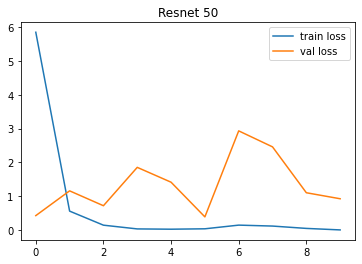

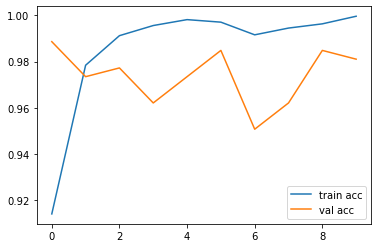

In [39]:
# plot the loss
plt.title("Resnet 50")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [40]:
model.save('Restnet50.h5')

C:\Users\Sumit Santra\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


### from all the models we can see that VGG16 has the best Testing Accuracy so we will choose this model as our final model

In [41]:
model = load_model('VGG16.h5')

In [42]:
Y_pred = model.predict(test_set)

In [43]:
Y_pred = np.argmax(Y_pred, axis=1)

In [44]:
Y_pred

array([1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

### Lets now confirm that our model is predicting the right class or not

In [45]:
model = load_model('VGG16.h5')

### I've Downloaded some images from unsplash to confirm that our model is classifying correctly or not

In [46]:
img1 = image.load_img("S:\Data Science Projects\Flip Robo\Image Scraping and Classification Project\confirm.jpg", target_size=(224,224))

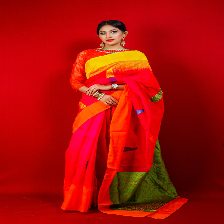

In [47]:
img1

### From above we can see that it is a Saree so for our model it is Class 1 as it is Folder number 1 in our directory

In [48]:
X1 = image.img_to_array(img1)

In [49]:
print(X1.shape)

(224, 224, 3)


### From above we can see that we have 224, 224 for our Image length and Width and 3 as it is a color image

In [50]:
X1 = X1/255

### Normalizing the Images between 0 and 1

In [51]:
X1=np.expand_dims(X1,axis=0)
img_data1=preprocess_input(X1)

In [52]:
print(img_data1.shape)

(1, 224, 224, 3)


### Lets first predict the Saree i.e img1 Class will be 1

In [53]:
model.predict(img_data1)
np.argmax(model.predict(img_data1), axis=1)

array([1], dtype=int64)

### from above we can see that model has Successfully classified the Image as Saree as the Class is 1

# So we can Say that our model is performing well and has an Accuracy of 99.24%